# 라이브러리 가져오기

In [24]:
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#csv는 엑셀과 달리 , 를 통해 데이터를 구분
colors = ["black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" ,"black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan", "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan", "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate"]
# 한글 폰트 사용을 위해서 세팅

import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# 데이터 가져오기

In [25]:
# 대출 데이터
lib_bor = pd.read_csv("./데이터2022/데이터_단행본대출.csv", encoding = 'cp949',low_memory=False) 
lib_bor = lib_bor.dropna(how='any') #-> NA하나라도 있으면 지움
lib_bor= lib_bor.drop([lib_bor.columns[0],lib_bor.columns[1],lib_bor.columns[2],lib_bor.columns[5],lib_bor.columns[9]], axis= 1)

#도서 데이터
book = pd.read_csv("./데이터2022/데이터_단행본도서.csv", encoding = 'cp949',low_memory=False) 
book = book.dropna(how='any') #-> NA하나라도 있으면 지움
book= book.drop([book.columns[0],book.columns[1],book.columns[2],book.columns[3],book.columns[6],book.columns[7],book.columns[8],book.columns[9],book.columns[11],book.columns[12]], axis= 1)

# 데이터 합병

In [26]:
bor_book =pd.merge(lib_bor,book, on = ['ISBN','서명'], how = 'outer')
bor_book = bor_book.dropna(how='any') #-> NA하나라도 있으면 지움
bor_book.index = np.arange(len(bor_book))
bor_book['연대출권수'] = bor_book['연대출권수'].astype(int)
bor_book['입학년도'] = bor_book['입학년도'].astype(int)

앞써 발견한 문제점 : 학생이 여러권의 도서를 빌릴때 서명이 맨앞에 한개만 남는다

해결책: primary key에 서명을 추가해 주자

In [27]:
#bor_book =bor_book.drop_duplicates(['연대출권수' ,'입학년도','소속'])
bor_book =bor_book.drop_duplicates(['연대출권수' ,'입학년도','소속','서명'])
bor_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59428 entries, 0 to 377011
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ISBN    59428 non-null  object
 1   서명      59428 non-null  object
 2   연대출권수   59428 non-null  int32 
 3   입학년도    59428 non-null  int32 
 4   소속      59428 non-null  object
 5   분류코드    59428 non-null  object
dtypes: int32(2), object(4)
memory usage: 2.7+ MB


In [28]:
bor_book.head(10)

ISBN                서명  연대출권수  입학년도        소속   분류코드
0   9788970551234           소유냐 삶이냐     90  2014    금융경제학과  111.1
2   9788970551234           소유냐 삶이냐      6  2016     컴퓨터학부  111.1
6   9788970551234           소유냐 삶이냐      7  2014     컴퓨터학부  111.1
8   9788970551234           소유냐 삶이냐     95  2010      경제학과  111.1
16  9788970551234           소유냐 삶이냐     39  2017      금융학부  111.1
20  9788970551234           소유냐 삶이냐    195  2012  글로벌미디어학부  111.1
22  9788970551234           소유냐 삶이냐     85  2017       철학과  111.1
26  9788970551234           소유냐 삶이냐     26  2017       철학과  111.1
28  9791186289501  노동법 원포인트 판례 170선     49  2010  벤처중소기업학과  348.6
30  9791186289501  노동법 원포인트 판례 170선     46  2010  벤처중소기업학과  348.6

# 데이터 전처리

분류코드를 10단위로 전처리 해주자

In [29]:
bor_book['분류코드'] =bor_book['분류코드'].astype(str)
bor_book['분류코드'] = bor_book['분류코드'].apply(lambda x : x[:3])
bor_book['분류코드'] =bor_book['분류코드'].astype(int)
bor_book['분류코드'] = bor_book['분류코드'].apply(lambda x : (x//10)*10)
bor_book.head(10)

ISBN                서명  연대출권수  입학년도        소속  분류코드
0   9788970551234           소유냐 삶이냐     90  2014    금융경제학과   110
2   9788970551234           소유냐 삶이냐      6  2016     컴퓨터학부   110
6   9788970551234           소유냐 삶이냐      7  2014     컴퓨터학부   110
8   9788970551234           소유냐 삶이냐     95  2010      경제학과   110
16  9788970551234           소유냐 삶이냐     39  2017      금융학부   110
20  9788970551234           소유냐 삶이냐    195  2012  글로벌미디어학부   110
22  9788970551234           소유냐 삶이냐     85  2017       철학과   110
26  9788970551234           소유냐 삶이냐     26  2017       철학과   110
28  9791186289501  노동법 원포인트 판례 170선     49  2010  벤처중소기업학과   340
30  9791186289501  노동법 원포인트 판례 170선     46  2010  벤처중소기업학과   340

# 전체 학생들 중 베스트 셀러 Top 10

In [30]:
#전체 베스트 셀러
item_count = bor_book['서명'].value_counts()[:10]
for idx, (val,cnt) in enumerate (item_count.iteritems(),1):
    print('Top',idx,":",val,cnt)

Top 1 : 왜 나는 너를 사랑하는가 212
Top 2 : 참을 수 없는 존재의 가벼움 202
Top 3 : 데미안 173
Top 4 : 총, 균, 쇠 :무기, 병균, 금속은 인류의 운명을 어떻게 바꿨는가 158
Top 5 : 사랑의 기술 150
Top 6 : 미분적분학 =Calculus 144
Top 7 : 이갈리아의 딸들 143
Top 8 : 위대한 개츠비 135
Top 9 : 역사란 무엇인가 126
Top 10 : 멋진 신세계 123


# 전체 학생들 중 인기 분야 Top 10

In [31]:
#전체 베스트 셀러 Top 순위 : 분류코드 개수
item_count = bor_book['분류코드'].value_counts()[:10]
for idx, (val,cnt) in enumerate (item_count.iteritems(),1):
    print('Top',idx,":",val,cnt)

Top 1 : 650 7093
Top 2 : 340 5472
Top 3 : 330 4871
Top 4 : 0 4049
Top 5 : 810 3349
Top 6 : 620 3035
Top 7 : 910 2447
Top 8 : 510 2397
Top 9 : 820 2214
Top 10 : 420 2203


# 재학생을 고려하여 12 ~ 21학번만 고려하자

In [32]:
bor_book = bor_book[bor_book['입학년도']> 2011]
bor_book.head(15)

ISBN                서명  연대출권수  입학년도        소속  분류코드
0   9788970551234           소유냐 삶이냐     90  2014    금융경제학과   110
2   9788970551234           소유냐 삶이냐      6  2016     컴퓨터학부   110
6   9788970551234           소유냐 삶이냐      7  2014     컴퓨터학부   110
16  9788970551234           소유냐 삶이냐     39  2017      금융학부   110
20  9788970551234           소유냐 삶이냐    195  2012  글로벌미디어학부   110
22  9788970551234           소유냐 삶이냐     85  2017       철학과   110
26  9788970551234           소유냐 삶이냐     26  2017       철학과   110
40  9791186289501  노동법 원포인트 판례 170선     43  2015       법학과   340
46  9791186289501  노동법 원포인트 판례 170선     17  2014    국제법무학과   340
58  9791186289501  노동법 원포인트 판례 170선     33  2013      경영학부   340
72  9791186289501  노동법 원포인트 판례 170선     47  2016       법학과   340
82  9791186289501  노동법 원포인트 판례 170선      6  2016    국제법무학과   340
84  9791186289501  노동법 원포인트 판례 170선     27  2015       법학과   340
90  9791186289501  노동법 원포인트 판례 170선    106  2015       법학과   340
92  9791186289501  노동법 원포인트 판례 170선     35  2014    사회복지학부   340

# TARGET 학생들 중 베스트 셀러 Top 10

In [33]:
#전체 베스트 셀러
item_count = bor_book['서명'].value_counts()[:10]
for idx, (val,cnt) in enumerate (item_count.iteritems(),1):
    print('Top',idx,":",val,cnt)

Top 1 : 왜 나는 너를 사랑하는가 205
Top 2 : 참을 수 없는 존재의 가벼움 193
Top 3 : 데미안 168
Top 4 : 사랑의 기술 141
Top 5 : 이갈리아의 딸들 141
Top 6 : 총, 균, 쇠 :무기, 병균, 금속은 인류의 운명을 어떻게 바꿨는가 140
Top 7 : 미분적분학 =Calculus 133
Top 8 : 위대한 개츠비 131
Top 9 : 역사란 무엇인가 122
Top 10 : 멋진 신세계 117


# TARGET 학생들 중 인기 분야 Top 10

In [34]:
#전체 베스트 셀러 Top 순위 : 분류코드 개수
item_count = bor_book['분류코드'].value_counts()[:10]
for idx, (val,cnt) in enumerate (item_count.iteritems(),1):
    print('Top',idx,":",val,cnt)

Top 1 : 650 6236
Top 2 : 340 4880
Top 3 : 330 4465
Top 4 : 0 3841
Top 5 : 810 3146
Top 6 : 620 2824
Top 7 : 910 2274
Top 8 : 510 2236
Top 9 : 820 2108
Top 10 : 420 1969


# (학과 학번)별로  분류

In [35]:
tmp_group = bor_book.groupby(['소속','입학년도'])

In [37]:
tmp_dic = dict(list(tmp_group))
tmp_dic.keys()

dict_keys([('AI융합학부', 2012), ('AI융합학부', 2013), ('AI융합학부', 2014), ('AI융합학부', 2015), ('AI융합학부', 2016), ('AI융합학부', 2017), ('AI융합학부', 2018), ('AI융합학부', 2019), ('AI융합학부', 2020), ('AI융합학부', 2021), ('건축학부', 2012), ('건축학부', 2013), ('건축학부', 2014), ('건축학부', 2015), ('건축학부', 2016), ('건축학부', 2017), ('건축학부', 2018), ('건축학부', 2019), ('건축학부', 2020), ('건축학부', 2021), ('경영학부', 2012), ('경영학부', 2013), ('경영학부', 2014), ('경영학부', 2015), ('경영학부', 2016), ('경영학부', 2017), ('경영학부', 2018), ('경영학부', 2019), ('경영학부', 2020), ('경영학부', 2021), ('경제학과', 2012), ('경제학과', 2013), ('경제학과', 2014), ('경제학과', 2015), ('경제학과', 2016), ('경제학과', 2017), ('경제학과', 2018), ('경제학과', 2019), ('경제학과', 2020), ('경제학과', 2021), ('국어국문학과', 2012), ('국어국문학과', 2013), ('국어국문학과', 2014), ('국어국문학과', 2015), ('국어국문학과', 2016), ('국어국문학과', 2017), ('국어국문학과', 2018), ('국어국문학과', 2019), ('국어국문학과', 2020), ('국어국문학과', 2021), ('국제무역학과', 2014), ('국제무역학과', 2015), ('국제무역학과', 2016), ('국제무역학과', 2017), ('국제무역학과', 2018), ('국제무역학과', 2019), ('국제무역학과', 2020), ('국제무역학과', 2021), ('국제법

In [40]:
exist_year = []
for n in range (2012,2022):
    exist_year.append(n)
exist_year

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [41]:
tmp_lst = list(bor_book['소속'])
exist_dept = list(set(tmp_lst)) #중복원소 제거 단 순서는 뒤죽박죽 -> 무관하기에 사용
print(exist_dept)

['글로벌통상학과', '화학과', '정보사회학과', '글로벌미디어학부', '철학과', '법학과', '언론홍보학과', '행정학부', '전자정보공학부 전자공학전공', '전기공학부', '물리학과', '스포츠학부', '수학과', '벤처경영학과(계약학과)', '금융학부', '의생명시스템학부', '컴퓨터학부', '회계학과', '사회복지학부', '독어독문학과', '사학과', '영어영문학과', '정보통신전자공학부', '혁신경영학과(계약학과)', '정치외교학과', '중어중문학과', '예술창작학부 영화예술전공', '일어일문학과', '금융경제학과', '산업·정보시스템공학과', '국제무역학과', '국제법무학과', '전자정보공학부 IT융합전공', '화학공학과', '경영학부', '예술창작학부 문예창작전공', '기계공학부', '정보통계·보험수리학과', '건축학부', '소프트웨어학부', '기독교학과', '복지경영학과(계약학과)', '불어불문학과', '국어국문학과', '융합특성화자유전공학부', '유기신소재·파이버공학과', '평생교육학과', '경제학과', '벤처중소기업학과', 'AI융합학부', '미디어경영학과']


In [61]:
#12~ 21
best_seller_dataframe = []
for year in exist_year:
    for dept in exist_dept:
                
        if (year < 2012):
            continue
        else:
            tmp_data_frame = bor_book[bor_book['입학년도']== year]
            tmp_data_frame = tmp_data_frame[tmp_data_frame['소속']== dept]
            best_seller_dataframe.append(pd.DataFrame(data= tmp_data_frame))
best_seller_dataframe[3]


ISBN                                                 서명  \
20      9788970551234                                            소유냐 삶이냐   
1807    9788996094043                                (윤성우의 열혈) C++ 프로그래밍   
3044    9791186671023                            (토커비) 토익 스피킹 :level 6~8   
13488   9788901214498                                              인지니어스   
15843   9788927807223     (프렌즈) 스페인·포르투갈 =Spain·Portugal :마드리드·바르셀로나·리스본   
...               ...                                                ...   
282231  9780521133548  Basic grammar in use :with answers : self-stud...   
284250  9788960771444                                    유니티 4 게임 개발의 정석   
288038  9791161650418                                         (이번엔!) 강원도   
300223  9788935305223                                    (새로 쓴) 소프트웨어 공학   
312942  9791159731228                                    (2019) 경제학 기출문제   

        연대출권수  입학년도        소속  분류코드  
20        195  2012  글로벌미디어학부   110  
1807       24  2012  글로벌미디어학부     0  
3044       58  2012  글로벌미디어학부   420  
13488     108  2012  글로벌미디어학부   150  
15843       7  2012  글로벌미디어학부   910  
...       ...   ...       ...   ...  
282231    195  2012  글로벌미디어학부   420  
284250      1  2012  글로벌미디어학부   790  
288038     26  2012  글로벌미디어학부   910  
300223      9  2012  글로벌미디어학부     0  
312942      8  2012  글로벌미디어학부   330  

[95 rows x 6 columns]

In [62]:
import math
#학번 별 베스트 셀러(2012~2021)
for dept, year in tmp_dic.keys(): #unpacking
    target_dept = ''

    for index_num in range(0,len(best_seller_dataframe)):
        my_zip = best_seller_dataframe[index_num]['소속'].value_counts().iteritems()
        for tmp_target_dept,count in best_seller_dataframe[index_num]['소속'].value_counts().iteritems(): #언패킹하기
            target_dept = tmp_target_dept
            
        if math.isnan(best_seller_dataframe[index_num]['입학년도'].mean()):
            continue
    
        if int(best_seller_dataframe[index_num]['입학년도'].mean()) == year and target_dept == dept: #보고 싶은 학번, 학과
            print("\n-------------------------",dept,"    ",year,"-------------------------")
            test = best_seller_dataframe[index_num]["서명"]
            item_count = test.value_counts()[:10]
            for idx, (val,cnt) in enumerate (item_count.iteritems(),1):
                print("")
                print('Top',idx,":",val)
            print("")


------------------------- AI융합학부      2012 -------------------------

Top 1 : 사랑의 기술

Top 2 : (예제 중심의) 파이썬3: 쉽고 재미있는 프로그래밍 언어

Top 3 : 안드로이드 앱 프로그래밍 :T아카데미의 명강의를 한 권에 담았다!

Top 4 : (빠르게 활용하는) 파이썬 3.2 프로그래밍 =Paython 3.2 programing

Top 5 : C programming :a modern approach

Top 6 : Computer systems :a programmer's perspective

Top 7 : 미분적분학 =Calculus

Top 8 : (예제중심의) 이산수학

Top 9 : Linear algebra and its applications

Top 10 : GIS 지리정보학 :이론과 실습


------------------------- AI융합학부      2013 -------------------------

Top 1 : (세계 속의)음식문화

Top 2 : 몽고디비 인 액션 =MongoDB in action

Top 3 : (쉽게 풀어쓴) C언어 express

Top 4 : Operating system concepts update

Top 5 : Operating system concepts

Top 6 : (나와 상대를 찾아가는 여정) 에니어그램 이론과 실제 :아홉가지 성격유형

Top 7 : 군주론

Top 8 : Java의 정석

Top 9 : 스크루테이프의 편지

Top 10 : (알기 쉬운)선형대수


------------------------- AI융합학부      2014 -------------------------

Top 1 : Linux kernel development

Top 2 : 이산수학

Top 3 : 파이썬 웹 프로그래밍: Django(장고)로 배우는 쉽고 빠른 웹 개발

Top 4 : Embedded Linux p


------------------------- 경영학부      2013 -------------------------

Top 1 : 세법개론

Top 2 : 경영학원론

Top 3 : 직무별 취업비법서 :국내 최초 현직자가 전하는

Top 4 : 경제학원론 =Economics

Top 5 : Essentials of investments

Top 6 : 경영전략 =Strategic management

Top 7 : IFRS 중급회계 =International financial reporting standards  intermediate accounting

Top 8 : 왜 나는 너를 사랑하는가

Top 9 : (조민혁의) 합격을 부르는 자소서

Top 10 : 글로벌경영:글로벌경쟁시대의 국제경영


------------------------- 경영학부      2014 -------------------------

Top 1 : Essentials of investments

Top 2 : 경영전략 =Strategic management

Top 3 : 데미안

Top 4 : 경영학원론

Top 5 : 파생상품의 평가와 헷징전략

Top 6 : (친절한) 재무회계 =A gentle introduction to Introduce financial accounting

Top 7 : (내 안의 위대한 혁명) 서번트 리더십=(The)servant leadership

Top 8 : 미시경제학 :수학노트와 연습문제 해답

Top 9 : 참을 수 없는 존재의 가벼움

Top 10 : 전략적 관리회계 =Strategic management accounting


------------------------- 경영학부      2015 -------------------------

Top 1 : Essentials of investments

Top 2 : (고객지향적) 유통관리 =Marketing channel management

Top 3 : 경영학원론


------------------------- 국어국문학과      2015 -------------------------

Top 1 : 한국현대문학사

Top 2 : 배비장전

Top 3 : 해변의 카프카 =Kafka on the shore  :무라카미 하루키 장편소설.상-하

Top 4 : 국어음운론 개설

Top 5 : 19세기 서울의 사랑 :절화기담, 포의교집

Top 6 : (최유찬의) 문예사조의 이해

Top 7 : 중등교직실무 =Practice of teaching profession for secondary school teachers

Top 8 : 국어 교육의 이해 :국어 교육의 미래를 모색하는 열여섯 가지 이야기

Top 9 : 전태일 평전

Top 10 : 공무원 최빈출 어휘 3000+: 기본어휘1500


------------------------- 국어국문학과      2016 -------------------------

Top 1 : 개념어 사전:인터넷에서도 검색할 수 없는 생생한 지식의 보물 창고

Top 2 : 문학비평 용어사전

Top 3 : 소피의 세계 :소설로 읽는 철학

Top 4 : 호모 루덴스:놀이와 문화에 관한 한 연구

Top 5 : 어린왕자

Top 6 : 이갈리아의 딸들

Top 7 : 광장

Top 8 : 國語史槪說

Top 9 : (삶은) 교육사회학 =Digest, sociology of education

Top 10 : 국어음운론 개설


------------------------- 국어국문학과      2017 -------------------------

Top 1 : 개념어 사전:인터넷에서도 검색할 수 없는 생생한 지식의 보물 창고

Top 2 : (최유찬의) 문예사조의 이해

Top 3 : 한국현대문학사

Top 4 : 장끼전

Top 5 : 국어음운론 개설

Top 6 : 나는 나를 파괴할 권리가 있다 :김영하 장편소설

Top 7 : 안나 카레니나

Top 8 : 호모 루덴스:놀이와


------------------------- 국제법무학과      2021 -------------------------

Top 1 : The civil law tradition :an introduction to the legal systems of Europe and Latin America

Top 2 : (체사레 벡카리아의) 범죄와 형벌

Top 3 : 물권법 :이론·사례·판례

Top 4 : 권리를 위한 투쟁

Top 5 : 기계진동학

Top 6 : 공업열역학

Top 7 : (실무에서 문제되는) 유형별 소멸시효 :이론·법령·판례 유기적으로 정리 :재판실무자료

Top 8 : 물권법 :민법강의 II

Top 9 : 관용론


------------------------- 글로벌미디어학부      2012 -------------------------

Top 1 : 손에 잡히는 프로세싱

Top 2 : (한 권으로 보는) 한국미술사 101장면 :선사시대 암각화에서 현대 미술까지

Top 3 : HMAT 현대자동차그룹 인·적성검사 :종합편

Top 4 : (ETS®) TOEIC® test 공식실전서 :RC :5세트

Top 5 : 사랑의 기술

Top 6 : 나는 일러스트레이터다 :비정규 아티스트 밥장이 알려주는 프리랜서의 명쾌한 자기 관리법

Top 7 : 빅데이터로 세상을 지배하는 사람들

Top 8 : 해변의 카프카 =Kafka on the shore  :무라카미 하루키 장편소설.상-하

Top 9 : 향수

Top 10 : 비밀1 - 2


------------------------- 글로벌미디어학부      2013 -------------------------

Top 1 : 코딩 인터뷰 완전 분석   :189가지 프로그래밍 문제와 해법

Top 2 : 참을 수 없는 존재의 가벼움

Top 3 : (C언어로 쉽게 풀어쓴) 자료 구조

Top 4 : (윤성우의 열혈) C 프로그래밍

Top 5 : 오사카 홀리데이

Top 6 : C로 

------------------------- 금융경제학과      2014 -------------------------

Top 1 : 증권투자론 =Investments ＆ security analysis

Top 2 : 해커스 투자자산운용사 :최종핵심정리문제집

Top 3 : 중국마케팅=China marketing

Top 4 : 통계학의 이해와 활용 =Understanding and application of statistical theory

Top 5 : 해커스 투자자산운용사: 최종핵심정리문제집

Top 6 : 평균의 종말 :평균이라는 허상은 어떻게 교육을 속여왔나

Top 7 : 심리학 입문

Top 8 : 소유냐 삶이냐

Top 9 : 바람의 노래를 들어라

Top 10 : IFRS 중급회계 =International financial reporting standards intermediate accounting


------------------------- 금융경제학과      2015 -------------------------

Top 1 : 안나 까레니나

Top 2 : 국제금융론 :연습문제 해답집

Top 3 : 반 고흐, 영혼의 편지

Top 4 : 면접의 달인

Top 5 : (핌코의 투자전략가 앤서니 크레센치의) 현명한 채권투자자

Top 6 : 국제금융론

Top 7 : (프렌즈) 런던 =London

Top 8 : 미국 서부


------------------------- 금융경제학과      2016 -------------------------

Top 1 : 글로벌 무역학개론

Top 2 : 맨큐의 경제학

Top 3 : (시사와 함께하는) 거시경제학

Top 4 : (객관식 다이어트) 경제학 :미시편

Top 5 : (기업) 재무관리

Top 6 : 서비스마케팅=Service marketing

Top 7 : (국가공인) 재경관리사 세무회계

Top 8 : 진로 탐색 및 직업 선택

Top 9 : 국제경제법

To


------------------------- 기계공학부      2016 -------------------------

Top 1 : (최신) 공업열역학

Top 2 : (공학도를 위한) 길잡이 공업수학

Top 3 : (공학도를 위한) 길잡이 공업수학 문제풀이집

Top 4 : (최신) 기계설계 =Mechanical engineering design

Top 5 : 열역학

Top 6 : Mechanics of materials

Top 7 : 기계공작법 =Manufacturing process

Top 8 : 유체역학

Top 9 : (Kreyszig) 공업수학

Top 10 : (Kreyszig 공업수학) 문제풀이 해설


------------------------- 기계공학부      2017 -------------------------

Top 1 : (최신) 공업열역학

Top 2 : 일반화학

Top 3 : (Kreyszig) 공업수학

Top 4 : (최신) 기계설계 =Mechanical engineering design

Top 5 : (공학도를 위한) 길잡이 공업수학 문제풀이집

Top 6 : (Kreyszig 공업수학) 문제풀이 해설

Top 7 : Mechanics of materials

Top 8 : 기계공작법 =Manufacturing process

Top 9 : 해커스 토익 reading

Top 10 : Materials science and engineering :an introduction


------------------------- 기계공학부      2018 -------------------------

Top 1 : (최신) 공업열역학

Top 2 : (줌달의) 일반화학

Top 3 : Mechanics of materials

Top 4 : (Kreyszig) 공업수학

Top 5 : 미분적분학 =Calculus

Top 6 : (Do it!) 점프 투 파이썬 :전면개정판

Top 7 : (Kreysz


------------------------- 독어독문학과      2019 -------------------------

Top 1 : 피아노 치는 여자 :엘프리데 옐리네크 장편소설

Top 2 : 향수 :어느 살인자의 이야기 :파트리크 쥐스킨트 장편소설

Top 3 : 이슬람의 실체

Top 4 : 데미안

Top 5 : 모더니즘과 포스트모더니즘

Top 6 : 변신·유형지에서 (외)

Top 7 : 제자도

Top 8 : 제3의 물결

Top 9 : 현대 이상심리학 =Modern abnormal psychology

Top 10 : 연을 쫓는 아이:할레드 호세이니 장편소설


------------------------- 독어독문학과      2020 -------------------------

Top 1 : 모래 사나이

Top 2 : 토니오 크뢰거 :토마스 만 단편선

Top 3 : 향수 :어느 살인자의 이야기 :파트리크 쥐스킨트 장편소설

Top 4 : 데미안

Top 5 : 인간 실격

Top 6 : 담론의 질서

Top 7 : 반지의 제왕

Top 8 : 게임이론 =Game theory :전략적 사고와 분석의 기초

Top 9 : 연을 쫓는 아이:할레드 호세이니 장편소설

Top 10 : 변신 :카프카 단편선


------------------------- 독어독문학과      2021 -------------------------

Top 1 : 예루살렘의 아이히만

Top 2 : 향수 :어느 살인자의 이야기 :파트리크 쥐스킨트 장편소설

Top 3 : 반지의 제왕


------------------------- 물리학과      2012 -------------------------

Top 1 : An introduction to computer simulation methods :applications to physical systems

Top 2 : 양자역학

Top 3 : Mechanics

Top 4 : 화성에서 온 남자


------------------------- 법학과      2018 -------------------------

Top 1 : 행정법강의 =Administrative law

Top 2 : 債權各論

Top 3 : 노동법 =Labour law

Top 4 : 국제법 판례 100선 =International law cases

Top 5 : 법철학 :이론과 쟁점

Top 6 : LEET 기출문제 해설집: 언어이해

Top 7 : 아내를 모자로 착각한 남자

Top 8 : 상법사례연습.하,어음·수표·보험·해상법 편

Top 9 : 사례형사소송법

Top 10 : 시녀 이야기


------------------------- 법학과      2019 -------------------------

Top 1 : 노동법 원포인트 판례 170선

Top 2 : 신국제법강의 :이론과 사례

Top 3 : 국제법 판례 100선 =International law cases

Top 4 : 친족상속법

Top 5 : 민법입문

Top 6 : 그 여자가 간절히 바라는 사랑, 그 남자가 진심으로 원하는 존경 :부부

Top 7 : (IFRS) 회계원리

Top 8 : (꼭 봐야할) 형소법 핵심기출 OX :핵심기출지문 컴팩트 총정리

Top 9 : 스크루테이프의 편지

Top 10 : 싱가포르 =Singapore


------------------------- 법학과      2020 -------------------------

Top 1 : 아Q정전:루신 소설선

Top 2 : (新) 민법입문

Top 3 : 지식생태학 :생태학, 죽은 지식을 깨우다

Top 4 : 문학과 예술의 사회사

Top 5 : 국제법 판례 100선 =International law cases

Top 6 : 역사란 무엇인가

Top 7 : (사시 변리사) 민사소송법 진도별 기출문제정리

Top 8 : 몰입의 즐거움

Top 9 : 민사소송법강의

Top 10 : 민사소송법(民事訴訟法) 강의


------------------------- 불어불문학과      2017 -------------------------

Top 1 : 피가로의 결혼

Top 2 : 델프 =DELF B2

Top 3 : 어두운 상점들의 거리:파트릭 모디아노 장편소설

Top 4 : DELF A2

Top 5 : 해상보험이론 :제1차 시험대비

Top 6 : 제2의 성

Top 7 : 구토

Top 8 : 데미안

Top 9 : 참을 수 없는 존재의 가벼움

Top 10 : 우리에겐 언어가 필요하다 :입이 트이는 페미니즘


------------------------- 불어불문학과      2018 -------------------------

Top 1 : 지옥에서 보낸 한 철

Top 2 : (론리플래닛 디스커버) 태국 :최고의 태국을 경험하기 위한 모든 것

Top 3 : (재미있는) 법률여행

Top 4 : 수수께끼 풀이는 저녁 식사 후에

Top 5 : 노트르담 드 파리

Top 6 : 한국현대문학사

Top 7 : (친절한) 재무회계 =Financial accounting

Top 8 : 국제무역계약론 =Contracts for the international sale of goods

Top 9 : 도둑맞은 편지

Top 10 : 차라투스트라는 이렇게 말했다


------------------------- 불어불문학과      2019 -------------------------

Top 1 : 현대인과 성서

Top 2 : 침묵

Top 3 : 영어패턴 500 플러스+ :말문이 터지는 영어회화 공식

Top 4 : 11문자 살인사건

Top 5 : 페드르

Top 6 : 바보 바보:이외수 소망상자

Top 7 : 글로벌 무역학개론

Top 8 : 레전드 영어 회화사전=English-Korean conversation dictionary

Top 9 : 노트르담 드 파리

Top 10 : 떼레즈 데께루·밤의 종말 [외]


----------------


------------------------- 산업·정보시스템공학과      2014 -------------------------

Top 1 : Introduction to operations research

Top 2 : Supply chain management :strategy, planning, and operation

Top 3 : (No.1 배극윤의) 품질경영 기사 필기 =Engineer quality management

Top 4 : Facilities planning

Top 5 : (프렌즈) 유럽 :베스트 시티 45 =Europe : best city 45

Top 6 : 회귀분석

Top 7 : (배극윤의) 품질경영기사 문제풀이    :2018 최신판

Top 8 : C 언어 for Beginner

Top 9 : Arena를 이용한 시뮬레이션

Top 10 : 삼성 소프트웨어 역량테스트 :삼성그룹 소프트웨어직군 공채 실전대비서


------------------------- 산업·정보시스템공학과      2015 -------------------------

Top 1 : 품질경영

Top 2 : Arena를 이용한 시뮬레이션

Top 3 : Introduction to operations research

Top 4 : Supply chain management:전략, 계획 및 운영

Top 5 : 실험계획법

Top 6 : 당신, 거기 있어줄래요? :기욤 뮈소 장편소설

Top 7 : SQL 전문가 가이드 =(The)guide for SQL professional

Top 8 : (알기 쉬운) 경영과학

Top 9 : Essentials of systems analysis and design

Top 10 : (No. 1 배극윤의) 품질경영기사 :필기


------------------------- 산업·정보시스템공학과      2016 -------------------------

Top 1 : 인간공학

Top 2 


------------------------- 수학과      2015 -------------------------

Top 1 : 수학교육학신론

Top 2 : 참을 수 없는 존재의 가벼움

Top 3 : 교육사회학

Top 4 : Introduction to cryptography :with coding theory

Top 5 : 선형대수학

Top 6 : 수리통계학

Top 7 : 경제학 연습 :미시편

Top 8 : Linear algebra and its applications

Top 9 : 향수 :어느 살인자의 이야기 :파트리크 쥐스킨트 장편소설

Top 10 : (Mathematica를 활용한) 미분기하학개론 =Elementary differential geometry with mathematica


------------------------- 수학과      2016 -------------------------

Top 1 : 보험수리학 = Actuarial mathematics

Top 2 : 수학교육학신론

Top 3 : Elementary number theory

Top 4 : The theory of interest

Top 5 : Linear algebra and its applications

Top 6 : 유클리드기하학

Top 7 : 선형 대수학과 그 응용

Top 8 : Mathematics for finance :an introduction to financial engineering

Top 9 : 유클리드 기하 개론

Top 10 : (2주 만에 끝내는) 해커스 토익 Speaking :level 7·8


------------------------- 수학과      2017 -------------------------

Top 1 : (괜찮은 척, 아무렇지 않은 척했던 순간에도) 어쩌면 내가 가장 듣고 싶었던 말

Top 2 : (알기 쉬운)선형대수

Top 3 : (가장 쉬운) 스페인어 첫걸음의 모든 것 


------------------------- 언론홍보학과      2020 -------------------------

Top 1 : 관광마케팅=Tourism marketing

Top 2 : (최적합) ACA 포토샵CC =Adobe Certified Associate & Photoshop CC :국제인증 자격증

Top 3 : 호밀밭의 파수꾼

Top 4 : Engineering vibration

Top 5 : 지역사회복지론

Top 6 : 사회복지 프로그램 개발과 평가 =Program planning and evaluation for social welfare

Top 7 : 인간커뮤니케이션과 미디어 :소통공간의 확장

Top 8 : (환경과 생활 속의) 화학

Top 9 : 1984

Top 10 : 우리들의 행복한 시간


------------------------- 언론홍보학과      2021 -------------------------

Top 1 : 뉴미디어와 정보사회 =New media in the information society

Top 2 : 매스미디어 연구방법론

Top 3 : 대중문화의 이해

Top 4 : 인간커뮤니케이션과 미디어 :소통공간의 확장

Top 5 : 젊은 날의 초상

Top 6 : 성경과의 만남 :다시 읽는 명저 :김성일 칼럼집

Top 7 : 올 댓 매너 =All that manner :글로벌매너, 비즈니스매너, 공공생활매너

Top 8 : (Kiip/Topik 걱정 덜어 주는)55 한국어 문법

Top 9 : 뉴미디어와 정보사회

Top 10 : 시나리오 어떻게 쓸 것인가


------------------------- 영어영문학과      2012 -------------------------

Top 1 : 캔터베리 이야기

Top 2 : (2주 만에 끝내는)해커스 토익 speaking :Level 7·8

Top 3 : 위대한 개츠비

Top 4 : (후니의 쉽게 쓴) 시스코 네트워킹

Top 


------------------------- 예술창작학부 영화예술전공      2016 -------------------------

Top 1 : 페미니즘의 도전

Top 2 : 나의 라임오렌지나무:어느 날 슬픔을 발견한 한 꼬마의 이야기

Top 3 : 우리에겐 언어가 필요하다 :입이 트이는 페미니즘

Top 4 : 좀비사전 :당신이 좀비에 대해 알고 싶은 모든 것

Top 5 : 대성당: 레이먼드 카버 소설

Top 6 : (Do it!) HTML5+CSS3 웹 표준의 정석

Top 7 : 수레바퀴 아래서

Top 8 : 영화조명핸드북

Top 9 : 호모 루덴스 :놀이하는 인간

Top 10 : 배우수첩 :배우들을 위한 연기 지침서


------------------------- 예술창작학부 영화예술전공      2017 -------------------------

Top 1 : 입속의 검은 잎:기형도 시집

Top 2 : 데미안

Top 3 : 나무

Top 4 : 미학 오디세이

Top 5 : 시나리오 어떻게 쓸 것인가

Top 6 : 예술가여, 무엇이 두려운가!

Top 7 : 사랑의 기술

Top 8 : 우리에겐 언어가 필요하다 :입이 트이는 페미니즘

Top 9 : 이갈리아의 딸들

Top 10 : 자유로부터의 도피


------------------------- 예술창작학부 영화예술전공      2018 -------------------------

Top 1 : 영화조명핸드북

Top 2 : 시나리오 어떻게 쓸 것인가

Top 3 : 액팅원 :연기에 대해 알아야 할 모든것

Top 4 : 燒紙

Top 5 : 향연

Top 6 : CFP 지식형 적중문제집

Top 7 : 위상수학기초론

Top 8 : 그림에, 마음을 놓다: 다정하게 안아주는 심리치유에세이

Top 9 : 달려라, 아비 :김애란 소설집

Top 10 : 지구 속 여행


------------------------- 예술창작학부 영화예술전공      2019 -


------------------------- 의생명시스템학부      2017 -------------------------

Top 1 : Fundamentals of organic chemistry

Top 2 : 생명과학

Top 3 : 생화학 실험서 =Biochemistry laboratory

Top 4 : (표준)일반화학실험

Top 5 : 생물학 실험서=Biology lab manual

Top 6 : 구토

Top 7 : 건축기술지침 =Architectural engineering guide

Top 8 : (McMurry) 기본유기화학

Top 9 : (기본) 유기화학

Top 10 : 화학의 이해


------------------------- 의생명시스템학부      2018 -------------------------

Top 1 : An introduction to biostatistics

Top 2 : 자유론

Top 3 : 우리에겐 언어가 필요하다 :입이 트이는 페미니즘

Top 4 : 생화학 실험 =Biochemistry experiments

Top 5 : (McMurry) 기본유기화학

Top 6 : (알베르트 아인슈타인) 상대성이론

Top 7 : 여자의 모든 인생은 20대에 결정된다 :세상 모든 남자들이 사랑할 수밖에 없는 알파걸로 사는 법

Top 8 : 이기적 유전자 :진화론의 새로운 패러다임

Top 9 : (신문으로 공부하는 말랑말랑) 시사상식  :종합편

Top 10 : 저항의 인문학 :인문주의와 민주적 비판


------------------------- 의생명시스템학부      2019 -------------------------

Top 1 : 생명과학

Top 2 : An introduction to biostatistics

Top 3 : (레닌저) 생화학

Top 4 : (알기 쉬운)선형대수

Top 5 : Lehninger principles of biochemistry

Top 6 : 모래


------------------------- 전기공학부      2020 -------------------------

Top 1 : Engineering circuit analysis

Top 2 : (2019 시나공) 컴퓨터활용능력: 1급 필기

Top 3 : 좀머 씨 이야기

Top 4 : 대학생을 위한 활용 독일어 =Lebendiges Deutsch fur studenten.1

Top 5 : 보건교사 안은영 :정세랑 장편소설

Top 6 : 국부론

Top 7 : 멋진 징조들

Top 8 : 전력전자공학

Top 9 : 전기기기

Top 10 : 학교사회복지론 =School social work


------------------------- 전기공학부      2021 -------------------------

Top 1 : 역사란 무엇인가

Top 2 : (Python으로 시작하는) 빅데이터분석 및 인공지능 :쉽고 간단한 예제를 이용한 빅데이터분석 및 인공지능 실습!

Top 3 : 수레바퀴 아래서

Top 4 : (전설로 떠나는) 월街의 영웅 :주식투자에서 상식으로 성공하는 법

Top 5 : (알기 쉽게 해설한) Java

Top 6 : C 기초 플러스 :최신 C11 버전 포함

Top 7 : (기초와 응용 실습을 중심으로 한) Allegro OrCAD PCB설계

Top 8 : 호밀밭의 파수꾼

Top 9 : 멋진 신세계

Top 10 : 고체화학


------------------------- 전자정보공학부 IT융합전공      2012 -------------------------

Top 1 : (2주 만에 끝내는) 해커스 OPIc start :intermediate 공략

Top 2 : (이렇게 기막힌 적중률 2017) 정보처리기사 :필기 기본서

Top 3 : (Rosen의) 이산수학

Top 4 : RF회로의 기초

Top 5 : Java의 정석

Top 6 : Computer networking     :a top-


------------------------- 전자정보공학부 전자공학전공      2021 -------------------------

Top 1 : 미분적분학 =Calculus

Top 2 : (핵심) 일반화학

Top 3 : 왜 나는 너를 사랑하는가

Top 4 : 역사란 무엇인가

Top 5 : 이기적 유전자 :진화론의 새로운 패러다임


------------------------- 정보사회학과      2012 -------------------------

Top 1 : 직무별 취업비법서 :국내 최초 현직자가 전하는

Top 2 : (Dear) 유통관리사 2급 :테마별 기출족보 총정리

Top 3 : 性의 역사

Top 4 : 사회조사분석사+α :2급필기 사회과학 조사방법론.2015

Top 5 : (Union) PSAT 원리와 기술 :상황판단

Top 6 : (2017) 수능기출 사회 Best 100

Top 7 : 민준호 사회 진도별 모의고사 :나의 응답

Top 8 : 경영전략

Top 9 : 내 영혼이 따뜻했던 날들

Top 10 : 육일약국 갑시다


------------------------- 정보사회학과      2013 -------------------------

Top 1 : The law and policy of the World Trade Organization :text, cases, and materials

Top 2 : (新) 국제경제법 =International economic law

Top 3 : Social network analysis :a handbook

Top 4 : 세법강의

Top 5 : 거시경제론

Top 6 : 나는 나를 파괴할 권리가 있다 :김영하 장편소설

Top 7 : (No plan! no problem!) Enjoy 푸껫

Top 8 : 종합물류의 이해

Top 9 : 총, 균, 쇠 :무기, 병균, 금속은 인류의 운명을 어떻게 바꿨는가

Top 10 : 글로벌경영


--------


------------------------- 정보통신전자공학부      2013 -------------------------

Top 1 : Computer networking :a top-down approach

Top 2 : 인터넷 이해와 활용 :인터넷 기초부터 홈페이지 제작실습까지

Top 3 : 정보 보안 개론 :한 권으로 배우는 보안 이론의 모든 것

Top 4 : 무선설비기사 =Radio operator :과년도

Top 5 : (최적합) 네트워크관리사 1·2급 필기 =Network Administrator :최고의 적중률로 합격을 보장하는 국가공인 2017년 최신 기출문제 수록

Top 6 : Principles of communication :systems, modulation, and noise

Top 7 : 삼성 소프트웨어 역량테스트 :삼성그룹 소프트웨어직군 공채 실전대비서

Top 8 : 데미안

Top 9 : 국가란 무엇인가

Top 10 : 인도 오지 기행:어머니의 품, 산들의 고향에 가다


------------------------- 정보통신전자공학부      2014 -------------------------

Top 1 : Eagle CAD 배우기

Top 2 : 아리랑 :趙廷來 大河小說

Top 3 : Introduction to analog and digital communications

Top 4 : 무궁화 꽃이 피었습니다 :김진명 장편소설

Top 5 : 데이터분석 전문가 준전문가 :단기완성

Top 6 : (MongoDB master가 해설하는) NoSQL & mongoDB

Top 7 : (김성천 강사의) PADS로 PCB 아트웍 혼자하기

Top 8 : 전자기학

Top 9 : 파리대왕

Top 10 : (new)외국계 기업 취업전략:헤드헌터가 공개하는 입사 노하우


------------------------- 정치외교학과      2012 -------------------------

Top 1


------------------------- 철학과      2015 -------------------------

Top 1 : 중국철학사

Top 2 : (퍼펙트) 무역영어 1급 =Perfect guide to trade English :이론 + 기출문제 :무역영어 2급 동시 대비

Top 3 : 인도철학사

Top 4 : 논리와 사고

Top 5 : 뇌는 윤리적인가 :뇌과학으로 푸는 인간 본성과 생명윤리의 딜레마

Top 6 : 정체성

Top 7 : 도덕경

Top 8 : (플라톤의) 국가(正體)

Top 9 : 한국철학사상사

Top 10 : 도의 논쟁자들 :중국 고대 철학 논쟁


------------------------- 철학과      2016 -------------------------

Top 1 : 중국철학사

Top 2 : 현대 인식론

Top 3 : 인식론의 역사

Top 4 : 도덕 형이상학을 위한 기초 놓기

Top 5 : 죽음의 철학

Top 6 : 傳習錄:실천적 삶을 위한 지침

Top 7 : 감시와 처벌:감옥의 역사

Top 8 : 한국철학사상사

Top 9 : 일리아스 =Ilias of Homeros

Top 10 : 장미의 이름 작가 노트


------------------------- 철학과      2017 -------------------------

Top 1 : 감시와 처벌:감옥의 역사

Top 2 : 대학·중용

Top 3 : 사랑의 기술

Top 4 : (플라톤의) 국가(正體)

Top 5 : 이방인

Top 6 : 중국철학사

Top 7 : 구토

Top 8 : Athenaze :an introduction to ancient Greek

Top 9 : 중용

Top 10 : 한국철학사상사


------------------------- 철학과      2018 -------------------------

Top 1 : 국가

Top 2 : 대학·중용

Top 3 : 중국철학사

Top 4 


------------------------- 평생교육학과      2016 -------------------------

Top 1 : 리더십 :이론과 실제

Top 2 : 미시경제학

Top 3 : (평생학습사회 실현을 위한) 성인학습 및 상담 =Adult learning and counselling

Top 4 : 리더십의 이론과 실제

Top 5 : 리더십

Top 6 : 평생교육경영론

Top 7 : E-learning by design

Top 8 : Leadership :theory and practice

Top 9 : (No plan! No problem!) Enjoy 도쿄

Top 10 : 미시경제학:수학노트와 연습문제 해답


------------------------- 평생교육학과      2017 -------------------------

Top 1 : (성공하는 사람들의)7가지 습관

Top 2 : 평생교육경영론

Top 3 : 변하는 것과 변하지 않는 것 :인문학적 마케팅 사고방식 :back to the basic

Top 4 : 예술치료

Top 5 : 리더십 :이론과 실제

Top 6 : 모모

Top 7 : 문학을 사랑하는 젊은이들에게

Top 8 : 허수아비춤 :조정래 장편소설

Top 9 : 그것은 사랑이 아니다

Top 10 : 설득의 심리학 :작은 시도로 큰 변화를 이끌어내는 '스몰 빅'의 놀라운 힘완결편


------------------------- 평생교육학과      2018 -------------------------

Top 1 : 구해줘 :기욤 뮈소 장편소설

Top 2 : 차라투스트라는 이렇게 말했다

Top 3 : 데미안

Top 4 : (아름다운 빈손)한경직

Top 5 : (S line) 전산회계 1급

Top 6 : 지적 대화를 위한 넓고 얕은 지식 :한 권으로 현실 세계를 통달하는 지식 여행서

Top 7 : 평생교육경영론 :평생교육기관 경영의 성과극대화를 위한

Top 8 : 인도기


------------------------- 화학공학과      2017 -------------------------

Top 1 : (표준)일반화학실험

Top 2 : 재료과학

Top 3 : 콜로이드와 계면활성제

Top 4 : 일반화학실험

Top 5 : 전기화학

Top 6 : 기초 이동현상론 :운동량, 열 및 물질전달

Top 7 : 예루살렘의 아이히만

Top 8 : 정량분석화학

Top 9 : 열전달

Top 10 : 일반화학


------------------------- 화학공학과      2018 -------------------------

Top 1 : (Kreyszig) 공업수학

Top 2 : 미분적분학 =Calculus

Top 3 : (McMurry) 기본유기화학

Top 4 : 이기적 유전자 :진화론의 새로운 패러다임

Top 5 : 재료과학

Top 6 : 콜로이드와 계면활성제

Top 7 : 일반화학

Top 8 : Fundamentals of organic chemistry

Top 9 : 분석화학실험 =Experiments in analytical chemistry

Top 10 : 전기화학


------------------------- 화학공학과      2019 -------------------------

Top 1 : 최신공정제어공학 :MATLAB의 활용과 실습

Top 2 : 디스플레이 공학개론 =Introduction to display engineering

Top 3 : 재료과학

Top 4 : (최신) 공정제어공학 :MATLAB의 활용과 실습 =Advanced process control systems : analysis & design

Top 5 : (Kreyszig) 공업수학

Top 6 : 일반화학

Top 7 : 기초 이동현상론 :운동량, 열 및 물질전달

Top 8 : (Kreyszig 공업수학) 문제풀이 해설

Top 9 : 분석화학실험=Experimental analytical 


------------------------- 회계학과      2019 -------------------------

Top 1 : 사랑의 기술

Top 2 : (2019) 세법개론 =Tax law

Top 3 : 과학기술의 철학적 이해

Top 4 : 공인회계사 기출문제집 :2018년 최신판

Top 5 : Corporate finance

Top 6 : IFRS 회계원리=International financial reporting standards accounting principles

Top 7 : 간디 자서전 :나의 진리실험 이야기

Top 8 : (유쾌한)회계상식:기본편

Top 9 : 한국문학통사

Top 10 : IFRS 중급회계 =International financial reporting standards  intermediate accounting


------------------------- 회계학과      2020 -------------------------

Top 1 : (IFRS) 중급회계 =Intermediate accounting

Top 2 : 눈사람 자살 사건

Top 3 : IFRS 중급회계 =International Financial Reporting Standards intermediate accounting

Top 4 : 향수 :어느 살인자의 이야기 :파트리크 쥐스킨트 장편소설

Top 5 : 교양노동법

Top 6 : 호밀밭의 파수꾼

Top 7 : 현대 패션과 의생활=Fashion ＆ Clothing

Top 8 : 뇌:베르나르 베르베르 장편소설

Top 9 : 수학 세상 가볍게 읽기

Top 10 : 부끄러움을 가르칩니다:박완서 소설


------------------------- 회계학과      2021 -------------------------

Top 1 : 회계원리 =Accounting principle

Top 2 : (처음 만나는) 인공지능 =Welcome to the A.I. w

In [ ]:
#학과 별 베스트 셀러(2012~2021)
for department in exist_dept:
########################################################################
#department = input("본인의 학과를 입력해주세요 \n\n")#
########################################################################
    target_dept = ''

    for index_num in range(0,len(best_seller_dataframe)):
    
        my_zip = best_seller_dataframe[index_num]['소속'].value_counts().iteritems()
        for tmp_target_dept,count in best_seller_dataframe[index_num]['소속'].value_counts().iteritems(): #언패킹하기
            target_dept = tmp_target_dept
        if target_dept == department: #보고 싶은 학과
            print("\n-------------------------",department,"-------------------------")
            test = best_seller_dataframe[index_num]["서명"]
            item_count = test.value_counts()[:10]
            for idx, (val,cnt) in enumerate (item_count.iteritems(),1):
                print("")
                print('Top',idx,":",val)
            print("")

In [14]:
print(tmp_dic[('건축학부',2018)]['서명'].count())
print(tmp_dic[('건축학부',2018)]['서명'])

128
3907                     (이규상) 건축계획학 :기본서 :국토계획법등법령개정반영
24278                         당신, 거기 있어줄래요? :기욤 뮈소 장편소설
45617                                            멋진 신세계
52139                                          이갈리아의 딸들
52155                                          이갈리아의 딸들
                              ...                      
374311                                예술에서의 정신적인 것에 대하여
374671                              (K-IFRS) 최신 회계원리 이해
376157    돈이 보이는 주식의 역사 :주식시장의 폭락과 버블 속에서 배우는 주식투자 인사이트
376210                                     법학개론 :2021년판
376569                                 기업금융과 M＆A :개정증보판
Name: 서명, Length: 128, dtype: object


In [15]:
x = tmp_dic.keys()
x_val =  np.arange(len(tmp_dic.keys()))
y_val = []
count= 0
for x in tmp_dic.keys():
    count += 1
    y_val.append(int(tmp_dic[(x)]['서명'].count()))

<BarContainer object of 466 artists>

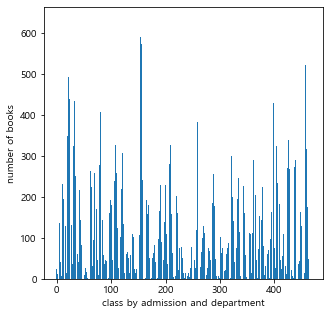

In [16]:
plt.figure(figsize=(5, 5)) #그래프의 크기조절
plt.xlabel("class by admission and department")
plt.ylabel("number of books")
plt.bar(x_val,y_val, align = 'center')

# 학번별 베스트 셀러 추천 서비스

In [17]:
exist_year = []
for n in range (2012,2022):
    exist_year.append(n)
exist_year

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [18]:
#12~ 21
best_seller_dataframe = []
for year in exist_year:
    if (year < 2012):
        continue
    else:
        tmp_data_frame = bor_book[bor_book['입학년도']== year]
        best_seller_dataframe.append(pd.DataFrame(data= tmp_data_frame))

In [20]:
#학번 별 베스트 셀러(2012~2021)
for admission_year in exist_year:
########################################################################
#admission_year = int(input("입학년도를 입력해주세요 (2012~2021) \n\n"))#
########################################################################

    for index_num in range(0,len(best_seller_dataframe)):
        if int(best_seller_dataframe[index_num]['입학년도'].mean()) == admission_year: #보고 싶은 학번
            print("\n-------------------------",int(best_seller_dataframe[index_num]['입학년도'].mean()),"-------------------------")
            test = best_seller_dataframe[index_num]["서명"]
            item_count = test.value_counts()[:10]
            for idx, (val,cnt) in enumerate (item_count.iteritems(),1):
                print("")
                print('Top',idx,":",val)
            print("")


------------------------- 2012 -------------------------

Top 1 : 총, 균, 쇠 :무기, 병균, 금속은 인류의 운명을 어떻게 바꿨는가

Top 2 : 왜 나는 너를 사랑하는가

Top 3 : (2주 만에 끝내는) 해커스 OPIc :advanced 공략

Top 4 : 경제학 연습 :미시편

Top 5 : 국가란 무엇인가

Top 6 : 해커스 토익 실전 1000제 :reading :해설집.1

Top 7 : (조민혁의) 합격을 부르는 자소서

Top 8 : 세법개론

Top 9 : (친절한) 재무회계 =A gentle introduction to Introduce financial accounting

Top 10 : 미시경제학


------------------------- 2013 -------------------------

Top 1 : 총, 균, 쇠 :무기, 병균, 금속은 인류의 운명을 어떻게 바꿨는가

Top 2 : 왜 나는 너를 사랑하는가

Top 3 : 참을 수 없는 존재의 가벼움

Top 4 : 데미안

Top 5 : 미분적분학 =Calculus

Top 6 : (조민혁의) 합격을 부르는 자소서

Top 7 : (2주 만에 끝내는) 해커스 OPIc :advanced 공략

Top 8 : 국가란 무엇인가

Top 9 : 진로 탐색 및 직업 선택 :NCS 직업기초능력의 이해와 실습

Top 10 : 경제학 연습 :미시편


------------------------- 2014 -------------------------

Top 1 : 참을 수 없는 존재의 가벼움

Top 2 : 미분적분학 =Calculus

Top 3 : 왜 나는 너를 사랑하는가

Top 4 : 데미안

Top 5 : 총, 균, 쇠 :무기, 병균, 금속은 인류의 운명을 어떻게 바꿨는가

Top 6 : 국제법 판례 100선 =International law cases

Top 7 : 미시경제학

Top 8 : 미시경제학 

# 학번별 DDC 추천 서비스

In [23]:
#학번 별 ddc 추천(2012~2021)
for admission_year in exist_year:
########################################################################
#    admission_year = int(input("입학년도를 입력해주세요 (2012~2021) \n\n"))#
########################################################################

    for index_num in range(0,len(best_seller_dataframe)):
        if int(best_seller_dataframe[index_num]['입학년도'].mean()) == admission_year: #보고 싶은 학번
            print("\n-------------------------",int(best_seller_dataframe[index_num]['입학년도'].mean()),"-------------------------")
            test = best_seller_dataframe[index_num]["분류코드"]
            item_count = test.value_counts()[:5]
            for idx, (val,cnt) in enumerate (item_count.iteritems(),1):
                print("")
                print(val, "~", val+9)
            print("")


------------------------- 2012 -------------------------

650 ~ 659

330 ~ 339

340 ~ 349

0 ~ 9

620 ~ 629


------------------------- 2013 -------------------------

650 ~ 659

340 ~ 349

330 ~ 339

0 ~ 9

620 ~ 629


------------------------- 2014 -------------------------

650 ~ 659

340 ~ 349

330 ~ 339

620 ~ 629

0 ~ 9


------------------------- 2015 -------------------------

650 ~ 659

340 ~ 349

0 ~ 9

330 ~ 339

810 ~ 819


------------------------- 2016 -------------------------

340 ~ 349

650 ~ 659

330 ~ 339

0 ~ 9

810 ~ 819


------------------------- 2017 -------------------------

340 ~ 349

650 ~ 659

0 ~ 9

330 ~ 339

810 ~ 819


------------------------- 2018 -------------------------

0 ~ 9

340 ~ 349

330 ~ 339

650 ~ 659

810 ~ 819


------------------------- 2019 -------------------------

810 ~ 819

0 ~ 9

650 ~ 659

330 ~ 339

340 ~ 349


------------------------- 2020 -------------------------

650 ~ 659

330 ~ 339

810 ~ 819

0 ~ 9

340 ~ 349


---------